In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [51]:
df = pd.read_csv('Default.csv')

In [52]:
df.default.factorize()

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['No', 'Yes'], dtype='object'))

In [54]:
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [55]:
df["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [56]:
df["default"].value_counts()/len(df["default"])

No     0.9667
Yes    0.0333
Name: default, dtype: float64

In [59]:
df[df.default2 == 0].sample(frac = 0.15)

,default,student,balance,income,default2,student2
5435,No,No,998.393070,46051.922860,0,0
6529,No,No,465.845664,52714.088863,0,0
2172,No,No,473.961439,35133.070407,0,0
1473,No,Yes,378.021115,19571.392304,0,1
1779,No,No,1031.126796,41022.095640,0,0
...,...,...,...,...,...,...
313,No,No,812.399297,49623.100982,0,0
6875,No,No,686.892929,51120.829980,0,0
5270,No,Yes,461.004341,15554.029765,0,1
8877,No,Yes,289.356947,15715.500652,0,1


In [60]:
# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

In [61]:
df_.shape

(1783, 6)

In [63]:
df_["default"].value_counts()

No     1450
Yes     333
Name: default, dtype: int64

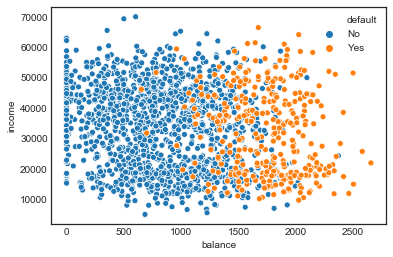

In [69]:
sns.scatterplot(x = 'balance', y = 'income', hue = 'default', data = df_);

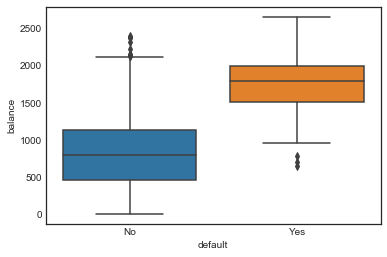

In [75]:
sns.boxplot(x = 'default', y = 'balance', data=df, orient='v');

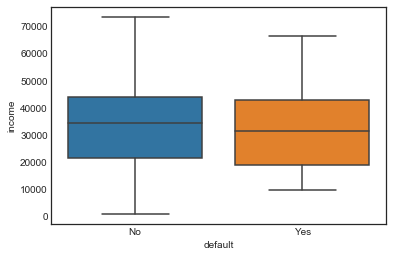

In [77]:
sns.boxplot(x = 'default', y = 'income', data=df, orient='v');

In [83]:
X_train = df.balance.values.reshape(-1,1) 
X_train.shape

(10000, 1)

In [84]:
y = df.default2
y.shape 

(10000,)

In [85]:
# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

In [86]:
prob

array([[9.99976331e-01, 2.36689794e-05],
       [9.99976201e-01, 2.37994885e-05],
       [9.99976069e-01, 2.39307171e-05],
       ...,
       [1.92314085e-02, 9.80768591e-01],
       [1.91279642e-02, 9.80872036e-01],
       [1.90250655e-02, 9.80974934e-01]])

In [87]:
clf.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

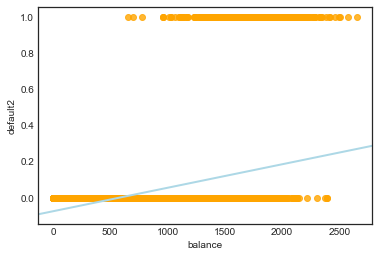

In [90]:
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2});

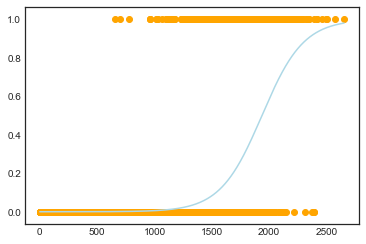

In [93]:
plt.scatter(X_train, y, color='orange')
plt.plot(X_test, prob[:,1], color='lightblue');

In [38]:
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549891]]
intercept : [-10.65132158]


## Statsmodels

In [98]:
X_train = sm.add_constant(df.balance)

In [99]:
X_train

,const,balance
0,1.0,729.526495
1,1.0,817.180407
2,1.0,1073.549164
3,1.0,529.250605
4,1.0,785.655883
...,...,...
9995,1.0,711.555020
9996,1.0,757.962918
9997,1.0,845.411989
9998,1.0,1569.009053


In [100]:
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
y.ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
est = sm.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [103]:
X_train = sm.add_constant(df.student2)
y = df.default2

est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


In [104]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721
